In [3]:
import pandas as pd
df = pd.read_csv("1745420889597_Epi_Task_Data.csv")
print(df.head())

   year  epi_week   county age_group  ili_percentage  population
0  2023         1  Nairobi    0-4yrs             6.1        3452
1  2024         1  Nairobi    0-4yrs             3.2        3658
2  2023         2  Nairobi    0-4yrs             4.5        3043
3  2024         2  Nairobi    0-4yrs             4.9        2765
4  2023         3  Nairobi    0-4yrs             4.6        6975


In [5]:
df.groupby(['county', 'year'])['ili_percentage'].mean().reset_index()

,county,year,ili_percentage
0,Kakamega,2023,4.060
1,Kakamega,2024,4.540
2,Kiambu,2023,3.895
3,Kiambu,2024,3.705
4,Kisumu,2023,4.065
5,Kisumu,2024,3.725
6,Machakos,2023,3.380
7,Machakos,2024,3.975
8,Mombasa,2023,3.895
9,Mombasa,2024,3.985


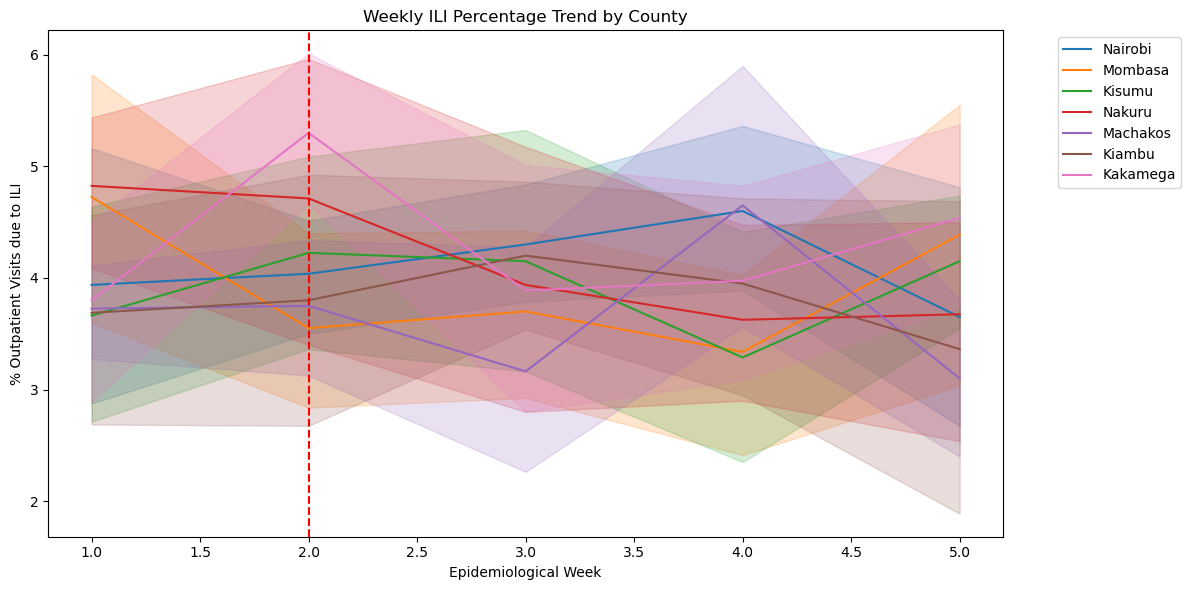

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='epi_week', y='ili_percentage', hue='county')
plt.title('Weekly ILI Percentage Trend by County')
plt.xlabel('Epidemiological Week')
plt.ylabel('% Outpatient Visits due to ILI')
weekly_mean = df.groupby('epi_week')['ili_percentage'].mean()
peak_week = weekly_mean.idxmax()
plt.axvline(x=peak_week, color='red', linestyle='--')  # Optional
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [21]:
df['ili_cases'] = (df['ili_percentage'] / 100) * df['population']
incidence_df = df.groupby('county')[['ili_cases', 'population']].sum().reset_index()
incidence_df['incidence_rate_per_100k'] = (incidence_df['ili_cases'] / incidence_df['population']) * 100000

In [17]:
from scipy.stats import f_oneway, kruskal
counties = ['Nairobi', 'Kisumu', 'Mombasa']
df_filtered = df[df['county'].isin(counties)]
f_oneway(*[df_filtered[df_filtered['county'] == c]['ili_percentage'] for c in counties])

F_onewayResult(statistic=0.2466992074648361, pvalue=0.7817811084684757)